In [2]:
from PIL import Image

from fdray import (
    Background,
    Box,
    Camera,
    Color,
    Include,
    Normal,
    SlopeMap,
    LightSource,
    Renderer,
    Scene,
)


In [39]:
def scene(*attrs) -> Scene:
    camera = Camera(90, 70, view_scale=1.2, look_at=(0.5, 1, 0))
    return Scene(
        Include("colors.inc", "textures.inc"),
        camera,
        LightSource(camera.location, "white"),
        Background("white", alpha=0.1),
        Box((0, 0, 0), (1, 2, 0.1), *attrs),
    )


def render(*attrs) -> Image.Image:
    renderer = Renderer(width=300, height=300)
    array = renderer.render(scene(*attrs))
    return Image.fromarray(array)

In [40]:
n = Normal("wood", SlopeMap((0, (0, 0)), (0.5, (1, 1)), (0.5, (1, -1)), (1, (0, -1))))

n = n.scale()
print(n)

TypeError: Transformable.scale() missing 1 required positional argument: 'x'

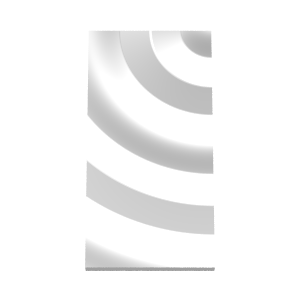

In [46]:
render("texture {Chrome_Metal}", n)

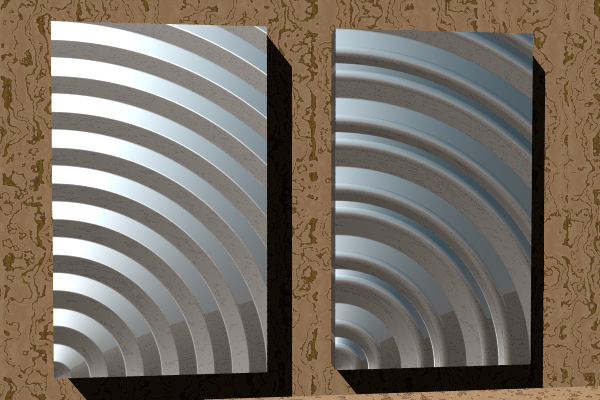

In [50]:
s = """
//-------------------- Fig. 12.2-1 slope_map
#version 3.7

#include "colors.inc"
#include "textures.inc"

global_settings
   {assumed_gamma 2.2}

camera{
  location<1,-9.5,3.2>
  sky<0,0,1>
  right <-image_width/image_height,0,0>
  look_at  <2,0,3>
  angle 50
}

light_source {<-20,-20,25> rgb 1.5 parallel point_at 0}


//=============================== slope_map 1
box{0,1 scale <3,5,1>
    texture {Chrome_Metal}
    normal {
      wood
      slope_map {
        [0   <0, 1>]
        [0.5 <1, 1>]
        [0.5 <1,-1>]
        [1   <0,-1>]
       }
      scale 1
     }
   rotate x*90
   translate <-1.5,0.8,0.5>
 }

//=============================== slope_map 2
box{0,1 scale <3,5,1>
    texture {Chrome_Metal}
    normal {
      wood
      slope_map {
        [0   <0, 1>]
        [0.5 <1, 1>]
        [0.8 <1,-1>]  // <<<---change
        [1   <0,-1>]
       }
      scale 1
     }
   rotate x*90
 translate <2.5,0.8,0.5>
}

//-----------------------------wall and floor
box{0,1 scale <20,1,20>  scale 1
  pigment {White_Wood  scale 0.5 }
  translate <-10,0.2,-1>  }

plane{ z, 0 texture {Cork scale 2} }

sky_sphere{
  pigment{
    gradient z
    color_map{
      [0.0 White]
      [0.5 SkyBlue]
     }
   }
 }
"""
renderer = Renderer(width=600, height=400)
array = renderer.render(s)
Image.fromarray(array)